### 티켓클래스 및 항구별 사망률 분석

#### 전처리

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # 

In [55]:
train = pd.read_csv('D:/thr_data/data/train.csv')

In [56]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [57]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
# Cabin 결측치 제거 
train.drop(["Cabin"],axis=1,inplace=True)

In [59]:
# Embarked 결측치 처리
train["Embarked"]=train["Embarked"].fillna('S')

In [60]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [61]:
# 1. 티켓 클래스 별 생존율 
pc = train[['Pclass','Survived']].groupby('Pclass').mean()

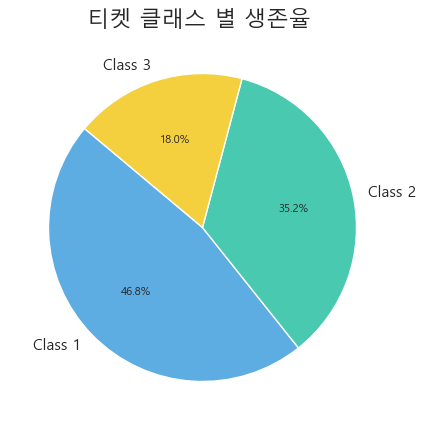

In [62]:
# 원형 그래프 그리기
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(pc['Survived'], 
       labels=[f'Class {i}' for i in pc.index],  # 레이블 설정
       autopct='%1.1f%%',                        # 퍼센트 표시 형식
       startangle=140,                           # 시작 각도
       colors=['#5DADE2', '#48C9B0', '#F4D03F']) # 색상 지정      

# 그래프 제목 설정
ax.set_title('티켓 클래스 별 생존율 ', fontsize=16)

# 그래프 보이기
plt.show()

클래스별 생존율을 통해, 3등석의 생존율이 가장 낮은 것을 알 수 있다.

=> 항구별 생존율을 확인해보려고 한다

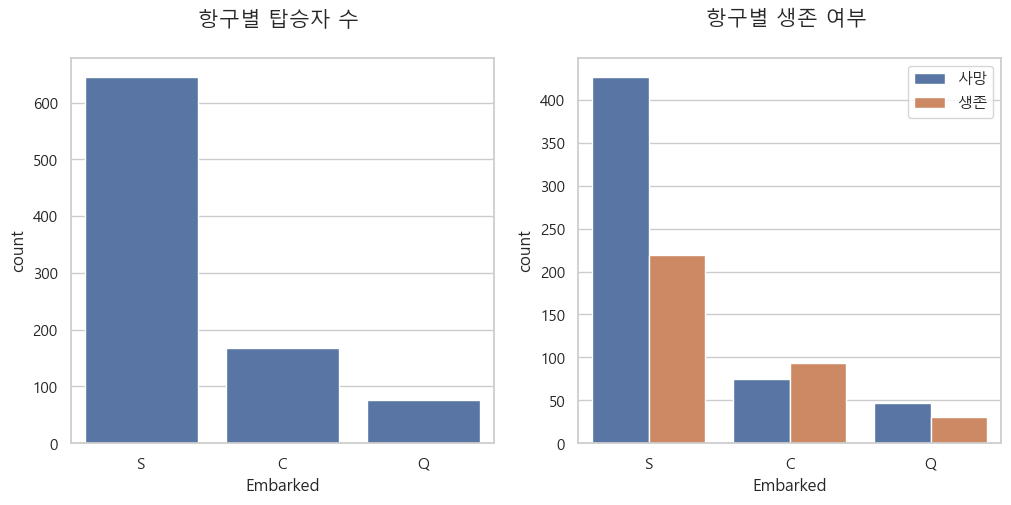

In [63]:
# 2. 항구별 탑승객들 티켓 클래스 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].set_title("항구별 탑승자 수 \n", size=15)
sns.countplot(x="Embarked", data=train, ax=axes[0])

axes[1].set_title("항구별 생존 여부 \n", size=15)
sns.countplot(x="Embarked", hue="Survived", data=train, ax=axes[1])
axes[1].legend(labels = ['사망', '생존'])

S 항구 탑승객이 가장 많아 사망자 또한 가장 많다.

In [64]:
train[["Embarked","Survived"]].groupby(['Embarked']).mean()


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


사망 비율을 통해 확인 결과, 여전히 S항구 탑승객 생존률이 가장 낮은 것을 알 수 있다.

=> 항구별 사망률 차이 원인을 알아보기 위해 티켓클래스를 확인해보려고한다.

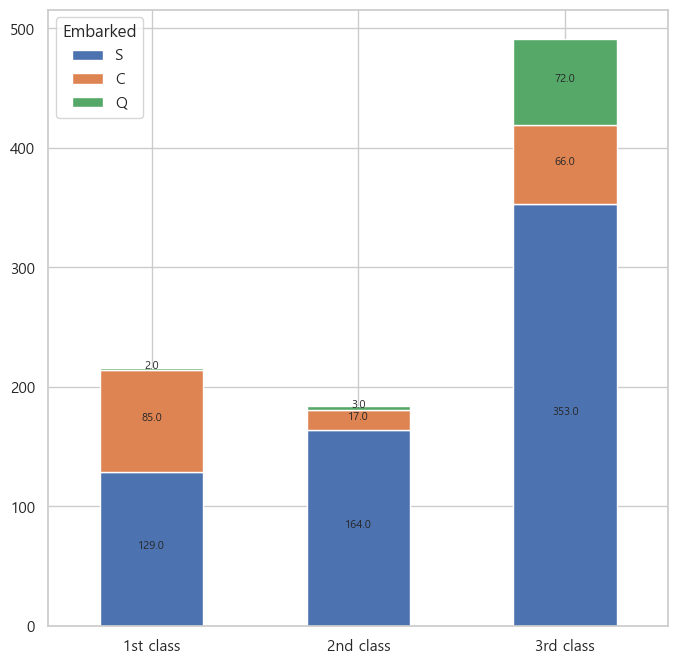

In [65]:
# 항구별 탑승객 티켓 클래스 

pc1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
pc2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
pc3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
pc = pd.DataFrame([pc1, pc2, pc3])
pc.index = ['1st class', '2nd class', '3rd class']

fig, ax = plt.subplots(figsize=(8, 8))
plt.rc('font',size =8)

pc.plot(kind='bar', stacked=True, ax=ax)

# x축 index 레이블 회전
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')  # 45도 회전, 오른쪽 정렬

for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2),   # 가로 위치
            p.get_y() + (p.get_height()/2),  # 세로 위치
            f"{p.get_height():.1f}",         # 값 + 표시방법 소수 둘째자리까지 
            ha='center')                     # 좌우정렬 중간으로



S항구 탑승객이 50% 이상이 3등석을 이용한 것을 확인할 수 있다. 

=> 3등석의 사망률이 높듯이, S항구 탑승객의 사망률이 높은 것을 확인할 수 있다. 